In [70]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
import plotly.express as px
set_log_level("ERROR")

In [49]:
##참고
#https://bigwaveai.tistory.com/28
## 코로나 거리두기와 신규 이용자 관련 데이터 제거

In [113]:
data=pd.read_csv("../../data/data_merged_with_train.csv", header=1).fillna(method='ffill').fillna(method='bfill')

In [114]:
data.head()

,date,air_GW,real_pop_GW,pop_GW,pop_male_GW,pop_female_GW,mvpop_GW,covid_total_GW,covid_new_GW,new_user_GW,...,rain(mm),relative_humidity,distance_stage,distance_total,distance_value,distance_nominal,GW_demand,DDM_demand,SD_demand,JL_demand
0,1/1/2018,2124.0000,421.214,357785,161143,174428,260642,0,0,19.016,...,0.0,39.1,0.0,0,0.0,0,0.592,0.368,0.580,0.162
1,1/2/2018,144880.6667,408.056,357785,161143,174428,438460,0,0,19.016,...,0.0,42.0,0.0,0,0.0,0,0.840,0.614,1.034,0.260
2,1/3/2018,114977.0000,406.174,357785,161143,174428,444544,0,0,19.016,...,0.0,42.3,0.0,0,0.0,0,0.828,0.576,0.952,0.288
3,1/4/2018,2216.0000,409.168,357785,161143,174428,446740,0,0,19.016,...,0.0,43.0,0.0,0,0.0,0,0.792,0.542,0.914,0.292
4,1/5/2018,3282.0000,408.793,357785,161143,174428,478999,0,0,19.016,...,0.0,48.4,0.0,0,0.0,0,0.818,0.602,0.994,0.308


In [116]:
data=data.drop(['new_user_DDM', 'new_user_JL', 'new_user_GW', 'new_user_SD','distance_stage','distance_nominal','distance_total'], axis=1)

In [117]:
data.columns

Index(['date', 'air_GW', 'real_pop_GW', 'pop_GW', 'pop_male_GW',
       'pop_female_GW', 'mvpop_GW', 'covid_total_GW', 'covid_new_GW',
       'station_GW', 'air_DDM', 'real_pop_DDM', 'pop_DDM', 'pop_male_DDM',
       'pop_female_DDM', 'mvpop_DDM', 'covid_total_DDM', 'covid_new_DDM',
       'station_DDM', 'air_SD', 'real_pop_SD', 'pop_SD', 'pop_male_SD',
       'pop_female_SD', 'mvpop_SD', 'covid_total_SD', 'covid_new_SD',
       'station_SD', 'air_JL', 'real_pop_JL', 'pop_JL', 'pop_male_JL',
       'pop_female_JL', 'mvpop_JL', 'covid_total_JL', 'covid_new_JL',
       'station_JL', 'keyword_diet', 'keyword_exercise',
       'keyword_healthypleasure', 'keyword_environment', 'keyword_green',
       'keyword_dust', 'keyword_', 'temp_avg', 'temp_low', 'temp_high',
       'rain(mm)', 'relative_humidity', 'distance_value', 'GW_demand',
       'DDM_demand', 'SD_demand', 'JL_demand'],
      dtype='object')

In [118]:
data=data.rename(columns={"date":"ds", "GW_demand":"y"})

In [120]:
col_lst=['air_GW', 'real_pop_GW', 'pop_GW', 'pop_male_GW',
       'pop_female_GW', 'mvpop_GW', 'covid_total_GW', 'covid_new_GW',
       'station_GW', 'air_DDM', 'real_pop_DDM', 'pop_DDM', 'pop_male_DDM',
       'pop_female_DDM', 'mvpop_DDM', 'covid_total_DDM', 'covid_new_DDM',
       'station_DDM', 'air_SD', 'real_pop_SD', 'pop_SD', 'pop_male_SD',
       'pop_female_SD', 'mvpop_SD', 'covid_total_SD', 'covid_new_SD',
       'station_SD', 'air_JL', 'real_pop_JL', 'pop_JL', 'pop_male_JL',
       'pop_female_JL', 'mvpop_JL', 'covid_total_JL', 'covid_new_JL',
       'station_JL', 'keyword_diet', 'keyword_exercise',
       'keyword_healthypleasure', 'keyword_environment', 'keyword_green',
       'keyword_dust', 'keyword_', 'temp_avg', 'temp_low', 'temp_high',
       'rain(mm)', 'relative_humidity', 'distance_value',
       'DDM_demand', 'SD_demand', 'JL_demand']
#y변수 정의
y_col_lst=['y']

In [121]:
cutoff = "2021-01-01" #데이터 분할 기준
train = data[data['ds']<cutoff]
test = data[data['ds']>=cutoff]

In [122]:
m = NeuralProphet(

growth='linear', # 추세 유형 설정(linear, discontinuous, off 중 선택 가능)

yearly_seasonality=True, #년간 계절성 설정

weekly_seasonality=True, #주간 계절성 설정

daily_seasonality=True, #일간 계절성 설정

batch_size=32,#배치 사이즈 설정

epochs=30,#학습 횟수 설정

learning_rate=0.1, # 학습률 설정

    


)

#독립 변인(변수) 추가 및 정규화
m = m.add_lagged_regressor(names=col_lst, normalize="minmax") 
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

#학습 수행
metrics = m.fit(train, freq='h', validation_df=test)

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [123]:
metrics.tail(3)

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
27,17.998320,155.760849,1.090253,0.0,27,1.529555,1.972732,0.014573,0.0
28,18.019371,155.358185,1.091403,0.0,28,1.522143,1.959786,0.014420,0.0
29,18.025696,155.345886,1.091804,0.0,29,1.522658,1.966164,0.014404,0.0


Predicting: 19it [00:00, ?it/s]

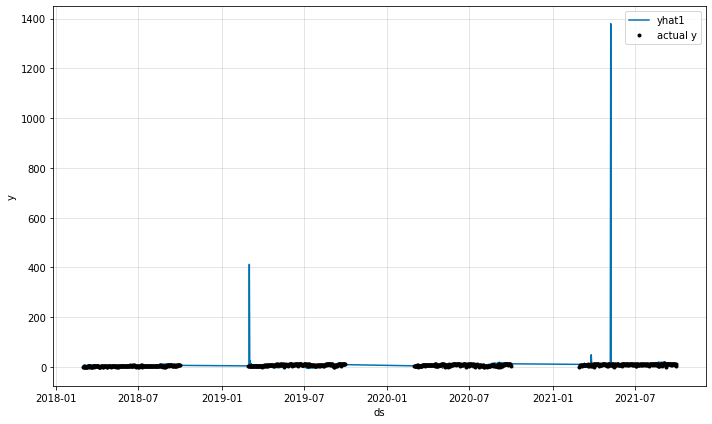

In [99]:
#yhat1과 실제값 시각화(lag 데이터 포함x)
forecast = m.predict(test)
fig = m.plot(forecast[['ds', 'y', 'yhat1']])

In [85]:
#학습 선 그래프 생성
px.line(metrics, y=['MAE', 'MAE_val'], width=800, height=400)

Predicting: 19it [00:00, ?it/s]

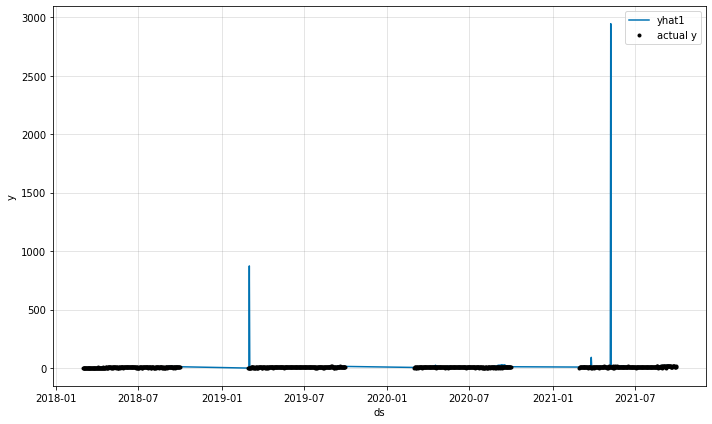

In [68]:
#yhat1과 실제값 시각화(lag 데이터 포함x)
forecast = m.predict(test)
fig = m.plot(forecast[['ds', 'y', 'yhat1']])

Predicting: 19it [00:00, ?it/s]

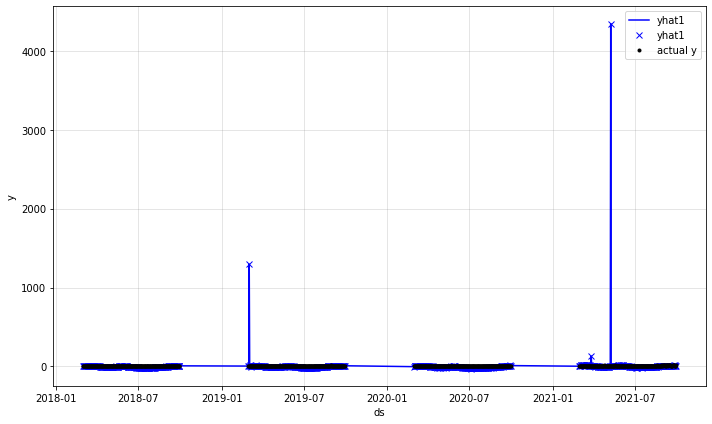

In [128]:
#yhat1과 실제값 시각화(lag 데이터 포함O)
forecast = m.predict(test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast)

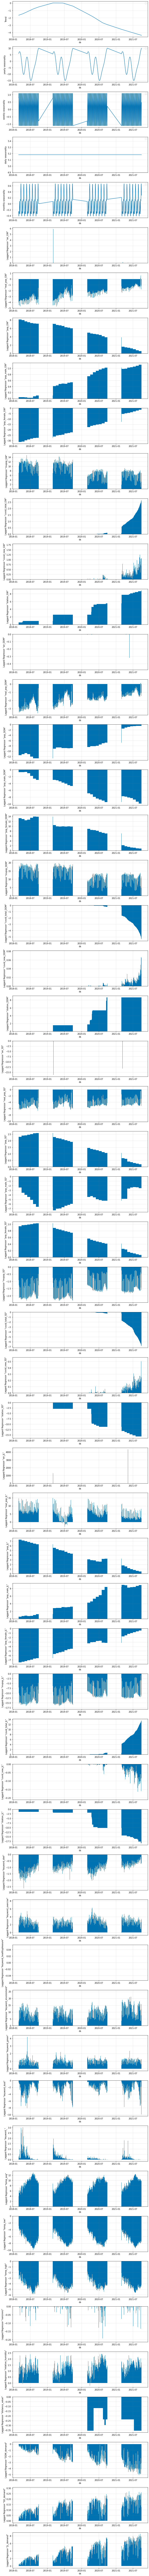

In [129]:
#1-ahead에 대한 변수별 components 시각화
fig_comp = m.plot_components(forecast)